In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib
import os


base_path = r'C:\Users\shrey\Downloads\heart+disease'
data_file = os.path.join(base_path, 'processed.cleveland.data')


columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(data_file, names=columns, na_values='?')
df = df.dropna()
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


X = df.drop('target', axis=1)
y = df['target']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


model_path = os.path.join(base_path, 'heart_model.pkl')
features_path = os.path.join(base_path, 'features.pkl')

joblib.dump(model, model_path)
joblib.dump(X.columns.tolist(), features_path)

print(f"SUCCESS! Files saved to:\n1. {model_path}\n2. {features_path}")

SUCCESS! Files saved to:
1. C:\Users\shrey\Downloads\heart+disease\heart_model.pkl
2. C:\Users\shrey\Downloads\heart+disease\features.pkl


Accuracy: 85.00%
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Graph saved as validation_matrix.png


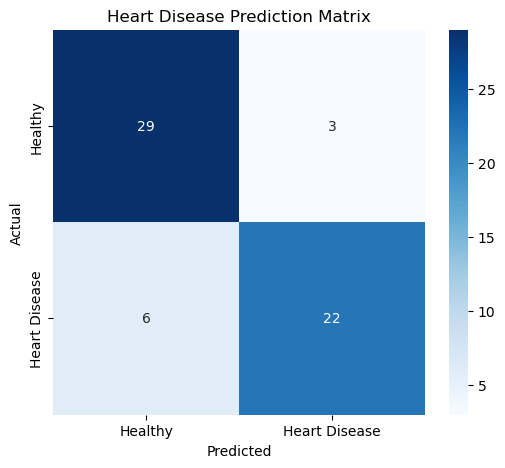

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r'C:\Users\shrey\Downloads\heart+disease\processed.cleveland.data'

try:
    columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
    df = pd.read_csv(file_path, names=columns, na_values='?')
    
    df = df.dropna()
    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
    
    X = df.drop('target', axis=1)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Heart Disease'], yticklabels=['Healthy', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Heart Disease Prediction Matrix')
    plt.savefig('validation_matrix.png')
    print("Graph saved as validation_matrix.png")

except FileNotFoundError:
    print("File not found. Please verify the path.")
except Exception as e:
    print(f"An error occurred: {e}")